<img src='../images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session A3: Scientific computing and data visualization

In the previous [Session A2: Data management with Pandas](2_data_management_with_pandas.ipynb), we have introduced the data management package Pandas. We will use it to process 2-dimensional tables as the fundamental data structure we will work with throughout all sessions. While Pandas is powerful, it has limits when it comes to **scientific computing** (*i.e.*, working with data mathematically). Two additional Python packages serve that purpose. The first is [NumPy](https://numpy.org/). NumPy expands the structured data universe from 1 (vectors) and 2 (dataframes or matrices) to $n$ dimension and provides mathematical functions to work with these so-called **arrays** (<a href='#sundnes_introduction_2020'>Sundnes, 2020</a>, ch. 6). NumPy has a fundamental role in data processing pipelines. Pandas builds on NumPy in the way dataframes can be addressed via indices.

However, NumPy and, hence, Pandas are unaware of (*i.e.*, not well prepared to handle) **data sparsity**. Data is sparse when it contains many zeros, missing values, or NaN (Not a Number) values, depending on the context. For example, consider the use of hashtags on Twitter: a tweet-hashtag matrix will be very sparse because many different hashtags are used in total but only up to a handful of them are used in a single tweet. In Computational Social Science, sparse data is the rule, not the exception. While Pandas offers [data structures for efficiently storing sparse data](https://pandas.pydata.org/docs/user_guide/sparse.html), sparse data processing is hardly developed. This is where SciPy, the other fundamental package for scientific computing comes in. [SciPy](https://scipy.org/) is the standard package for handling sparse data. Beyond sparse data routines, SciPy provides tools for integration, optimization, statistics, and handling spatial data, among others.

Scientific computing is more than just data wrangling; it is data wrangling for the purpose of producing scientific knowledge. We can better understand what that means when we think about how knowledge is produced in the interplay of exploration and confirmation. The **Exploratory Data Analysis** (EDA) paradigm states that this process consists of the three steps to

1. imagine an initial model of the problem at hand,
2. produce an initial answer to the research question, and
3. assess the initial model and answer via data analysis.

This process is a loop because the third step brings one back to the first where the initial model is refined. In its beginning, the loop is exploratory in nature, which means, data analysis does not yet involve hypothesis testing or predicting unseen data. It rather consists of looking at trends, distributions, and bivariate relationships. Knowledge production, thus, begins with seeking confirmation via exploration (<a href='#mclevey_doing_2022'>McLevey, 2022</a>, ch. 7.4).

**Data visualization** is essential in EDA. In the words of McLevey (<a href='#mclevey_doing_2022'>2022</a>, ch. 7.5):

> Creating good graphs has little to do with Python and everything to do with the decisions you make about what to show and how to show it. Some of these decisions are high level, like the kind of graph and how it should be structured. Other decisions are low level, like selecting colours and shapes.

Effective visualization basically means to avoid typical mistakes regarding aesthetics, substantive data problems, and being inattentive to the realities of human perception (<a href='#mclevey_doing_2022'>McLevey, 2022</a>, ch. 7.5). [Matplotlib](https://matplotlib.org/) is Python's basic package for creating visualizations. Matplotlib gives you many options regarding kinds of plots and how to style them, but achieving what you want can be cumbersome. The [Seaborn](https://seaborn.pydata.org/) package is an easier-to-use interface "for drawing attractive and informative statistical graphics" that builds on Matplotlib and integrates closely with Pandas data structures.

The R language and software environment for statistical computing and graphics is very popular in the social sciences, also because it provides the [Tidyverse](https://www.tidyverse.org/), a collection of mutually adapted packages for tabular data structures, their manipulation (*e.g.*, merging, aggregating), and producing appealing graphics (<a href='#weidmann_data_2023'>Weidmann 2023</a>, ch. 7). We argue that Python does not need to hide behind R in this regard. Pandas, when combined with the [Seaborn](https://seaborn.pydata.org/) statistical data visualization package, with NumPy and SciPy in the loop, leaves nothing to be desired.

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn basic steps of scientific computing and data visualization. The TweetsCOV19 dataset will continue to function as the example. In subsession **A3.1**, we will introduce the NumPy package to work with $n$-dimensional arrays which are often needed in data processing. In subsession **A3.2**, we will get to know SciPy and how to handle sparse data with it. Finally, in subsession **A3.3**, you will learn how to use the Matplotlib and Seaborn packages to explore data visually.
</div>

## Learning objectives

By the end of this session, you should be able to
- work mathematically with data,
- use NumPy and understand its $n$-dimensional array structure,
- understand the problem that comes with sparse data,
- use SciPy to handle sparse matrices,
- understand what Exploratory Data Analysis is,
- explore data using NumPy, Matplotlib, and Seaborn.

## A3.1. Using NumPy to store data in $n$-dimensional arrays

<img src='../images/numpy.png' style='height: 100px; float: right; margin-left: 10px'>

Pandas offers Series and DataFrames as native data structures, but its mathematical operations rely on the corresponding NumPy data structures: vectors and matrices. NumPy is purely numerical. The basic differences between Pandas and NumPy are:

- NumPy provides $n$-dimensional data structures called arrays, not just vectors and matrices.
- NumPy does not allow items to be lists.
- NumPy does not have metadata (*i.e.*, the indices of arrays are not labeled)

One use of NumPy is to store data in numerical form as part of a data processing pipeline. We will now go through two examples where data is stored in 2-dimensional and 3-dimensional arrays, respectively. For the **2-dimensional example**, consider that you want to create an array where the rows are days, the columns are hashtags, and the cells give the number of times that a hashtag is used in a day. We have created the necessary `days_hashtags_long` table in the previous session.

In [1]:
import pandas as pd

In [2]:
days_hashtags_long = pd.read_csv(filepath_or_buffer='../data/TweetsCOV19/days_hashtags_long.tsv', sep='\t', index_col=None, encoding='utf-8')
days_hashtags_long

,day,hashtag,tweets
0,2020-05-01,coronavirus,1790
1,2020-05-01,covid19,3687
2,2020-05-01,hydroxychloroquine,18
3,2020-05-01,vaccine,25
4,2020-05-02,coronavirus,1498
...,...,...,...
119,2020-05-30,vaccine,12
120,2020-05-31,coronavirus,616
121,2020-05-31,covid19,1232
122,2020-05-31,hydroxychloroquine,7


We can make this table wide by using the [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) method, which imitates the corresponding procedure in the Excel spreadsheet software:

In [3]:
days_hashtags_wide = days_hashtags_long.pivot(index='day', columns='hashtag', values='tweets')
days_hashtags_wide.head()

hashtag,coronavirus,covid19,hydroxychloroquine,vaccine
day,,,,
2020-05-01,1790,3687,18,25
2020-05-02,1498,2335,11,27
2020-05-03,1343,2115,17,28
2020-05-04,1833,3566,27,38
2020-05-05,1739,3974,28,35


We can transform the table into a NumPy array to get what we want. Appending `[:5]` to an array corresponds to appending `head()` to a dataframe: it will only show the first five rows:

In [4]:
days_hashtags_wide_array = days_hashtags_wide.to_numpy()
days_hashtags_wide_array[:5]

array([[1790, 3687,   18,   25],
       [1498, 2335,   11,   27],
       [1343, 2115,   17,   28],
       [1833, 3566,   27,   38],
       [1739, 3974,   28,   35]], dtype=int64)

What we see is the dataframe stripped of its metadata.

For the **3-dimensional example**, obviously, we cannot use Pandas all the way since it only supports matrices. But we can still use it to process the data before we store it in an array. Consider that you want to create an array where the first dimension is days, the second dimension is mentioned users, the third dimension is sentiment categories (positive, negative, and average), and the cells give the mean sentiment scores of tweets in which users are mentioned in a day. First, load the necessary tables...

In [5]:
tweets = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/tweets.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8', parse_dates = ['timestamp'])
users = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/users.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')
tweets_mentions = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/tweets_mentions.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')
tweets_hashtags = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/tweets_hashtags.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')
tweets_sentiments = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/tweets_sentiments.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')
mentions = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/mentions.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')
hashtags = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/hashtags.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')
sentiments = pd.read_csv(filepath_or_buffer = '../data/TweetsCOV19/TweetsCOV19_tables/sentiments.tsv.gz', sep = '\t', index_col = None, encoding = 'utf-8')

and prepare a list of mentions to analyze:

In [6]:
mention_list = ['realdonaldtrump', 'who', 'breitbartnews', 'cnn']

In [Session A2: Data management with Pandas](2_data_management_with_pandas.ipynb), we have normalized the sentiment information, which means, we have also created `tweets_sentiments` and `sentiments` tables even though this seemed to be a little more data processing than necessary. But now we benefit from having normalized the data all the way through because arrays can naturally be **populated from normalized tables**. The full information we need is stored in five tables, so we would need four joins. However, since we use all three sentiment categories (and all three indices) from the `sentiments` table, we will spare the fourth join to the `sentiments` table and use the `sentiment_idx` for the third dimension instead. Note that we do not `drop` the 'tweet_idx' in the first join (lines 1–2) because we will also need it in line 6 to prepare the third join (lines 6–8). Line 9 extracts the date. Line 11 computes the mean sentiment scores:

In [7]:
days_mentions_sentiments_long = tweets_mentions.set_index(keys='tweet_idx', drop=False).join(
    other = tweets[['timestamp']]
).set_index('mention_idx').join(
    other = mentions[mentions['mention'].isin(mention_list)][['mention']], 
    how = 'inner'
).set_index(keys='tweet_idx').join(
    other = tweets_sentiments.set_index(keys='tweet_idx')
).reset_index(drop=True)
days_mentions_sentiments_long['day'] = days_mentions_sentiments_long['timestamp'].dt.date
del days_mentions_sentiments_long['timestamp']
days_mentions_sentiments_long = days_mentions_sentiments_long.groupby(['day', 'mention', 'sentiment_idx']).mean().round(4).reset_index()
days_mentions_sentiments_long.head()

,day,mention,sentiment_idx,score
0,2020-05-01,breitbartnews,0,1.3509
1,2020-05-01,breitbartnews,1,-1.8772
2,2020-05-01,breitbartnews,2,-0.2632
3,2020-05-01,cnn,0,1.6936
4,2020-05-01,cnn,1,-1.8596


From this table, we now create the array, and the first three columns are the three dimensions. Since NumPy indexing is purely numerical, we must represent the days and mentions in this table by identifiers that start with 0 and are contiguous (just like the 'sentiment_idx'). In other words, we must make the first two variables categorical (if you know R, you will recognize the 'category' data type). Transform the first two columns using `astype('category')`:

In [8]:
days_mentions_sentiments_long['day'] = days_mentions_sentiments_long['day'].astype('category')
days_mentions_sentiments_long['mention'] = days_mentions_sentiments_long['mention'].astype('category')

Before replacing the category labels by their numerical codes, we save them:

In [9]:
day_categories = days_mentions_sentiments_long['day'].cat.categories
day_categories

Index([2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, 2020-05-05, 2020-05-06,
       2020-05-07, 2020-05-08, 2020-05-09, 2020-05-10, 2020-05-11, 2020-05-12,
       2020-05-13, 2020-05-14, 2020-05-15, 2020-05-16, 2020-05-17, 2020-05-18,
       2020-05-19, 2020-05-20, 2020-05-21, 2020-05-22, 2020-05-23, 2020-05-24,
       2020-05-25, 2020-05-26, 2020-05-27, 2020-05-28, 2020-05-29, 2020-05-30,
       2020-05-31],
      dtype='object')

In [10]:
mention_categories = days_mentions_sentiments_long['mention'].cat.categories
mention_categories

Index(['breitbartnews', 'cnn', 'realdonaldtrump', 'who'], dtype='object')

It is useful to also store the sentiment categories in a variable:

In [11]:
sentiment_categories = sentiments['sentiment'].tolist()
sentiment_categories

['positive', 'negative', 'average']

Now we can replace the categories by their codes:

In [12]:
days_mentions_sentiments_long['day'] = days_mentions_sentiments_long['day'].cat.codes
days_mentions_sentiments_long['mention'] = days_mentions_sentiments_long['mention'].cat.codes

In [13]:
days_mentions_sentiments_long.head()

,day,mention,sentiment_idx,score
0,0,0,0,1.3509
1,0,0,1,-1.8772
2,0,0,2,-0.2632
3,0,1,0,1.6936
4,0,1,1,-1.8596


We have arrived at a purely numerical table where all cells that represent the dimensions are integers. This is a data structure that NumPy can work with. To transform the table into an array:

In [14]:
days_mentions_sentiments_long_array = days_mentions_sentiments_long.to_numpy()
days_mentions_sentiments_long_array[:5]

array([[ 0.    ,  0.    ,  0.    ,  1.3509],
       [ 0.    ,  0.    ,  1.    , -1.8772],
       [ 0.    ,  0.    ,  2.    , -0.2632],
       [ 0.    ,  1.    ,  0.    ,  1.6936],
       [ 0.    ,  1.    ,  1.    , -1.8596]])

To make this long array wide, first, create an empty container (array) with a 3-dimensional `shape` where the first dimension is as long as there are days, the second dimension is as long as there are mentions, and the third dimension is as long as there are sentiment categories. Note that `days_mentions_sentiments_long_array` contains float variables even though the first three columns were integers in the dataframe. This is because an array (of the `ndarray` class) only permits one data type and the last column contains floats. To handle this situation, we use a trick: we create a container for string variables (`dtype='object'`) because integers and floats can be encoded as strings. Initially, each cell is Not a Number (NaN).

In [15]:
import numpy as np
np.__version__

'1.21.5'

In [16]:
days_mentions_sentiments_wide_array = np.empty(shape=(len(day_categories), len(mention_categories), len(sentiments)), dtype='object')
days_mentions_sentiments_wide_array[:] = np.nan

Then fill this array by using the first three columns of `days_mentions_sentiments_long_array` as indices – recall that Pandas actually took over indexing from NumPy – for the wide array and filling the cells from the fourth column. Note that we transform the first three columns from 'object' to 'int' and the last to 'float'. Appending `[:5]` now means that the matrices of mentions and sentiments for the first five days are shown:

In [17]:
days_mentions_sentiments_wide_array[
    days_mentions_sentiments_long_array[:, 0].astype('int'), 
    days_mentions_sentiments_long_array[:, 1].astype('int'), 
    days_mentions_sentiments_long_array[:, 2].astype('int')
] = days_mentions_sentiments_long_array[:, 3].astype('float')
days_mentions_sentiments_wide_array[:5]

array([[[1.3509, -1.8772, -0.2632],
        [1.6936, -1.8596, -0.083],
        [1.6592, -1.9385, -0.1397],
        [1.6349, -1.6587, -0.0119]],

       [[1.4615, -1.9808, -0.2596],
        [1.5636, -1.9909, -0.2136],
        [1.6018, -1.9477, -0.173],
        [1.6195, -1.6018, 0.0088]],

       [[1.4706, -2.0392, -0.2843],
        [1.5378, -1.7563, -0.1092],
        [1.5842, -1.8785, -0.1471],
        [1.58, -1.78, -0.1]],

       [[1.297, -1.3663, -0.0347],
        [1.5563, -1.7746, -0.1092],
        [1.6124, -1.9782, -0.1829],
        [1.5956, -1.7426, -0.0735]],

       [[1.3103, -1.4483, -0.069],
        [1.4967, -1.8824, -0.1928],
        [1.6235, -1.9978, -0.1871],
        [1.6822, -1.5039, 0.0891]]], dtype=object)

We can slice an $n$-dimensional array any way we want. For example, the matrix of days and sentiments for the first mentioned user 'breitbartnews' is:

In [18]:
print(mention_categories[0])
days_mentions_sentiments_wide_array[:, 0, :]

breitbartnews


array([[1.3509, -1.8772, -0.2632],
       [1.4615, -1.9808, -0.2596],
       [1.4706, -2.0392, -0.2843],
       [1.297, -1.3663, -0.0347],
       [1.3103, -1.4483, -0.069],
       [1.4583, -1.8194, -0.1806],
       [1.48, -1.54, -0.03],
       [1.375, -1.7143, -0.1696],
       [1.3284, -1.9552, -0.3134],
       [1.2973, -1.4595, -0.0811],
       [1.25, -1.6667, -0.2083],
       [1.1951, -1.6707, -0.2378],
       [1.2745, -1.6667, -0.1961],
       [1.3506, -1.8442, -0.2468],
       [1.2532, -1.557, -0.1519],
       [1.4375, -1.75, -0.1562],
       [1.449, -1.8163, -0.1837],
       [1.2588, -1.5647, -0.1529],
       [1.6883, -1.961, -0.1364],
       [1.4727, -1.6909, -0.1091],
       [1.3239, -1.5775, -0.1268],
       [1.3846, -1.7436, -0.1795],
       [1.3462, -1.5, -0.0769],
       [1.425, -1.5, -0.0375],
       [1.3269, -1.7885, -0.2308],
       [1.2432, -1.7568, -0.2568],
       [1.2449, -1.9388, -0.3469],
       [1.1333, -1.8667, -0.3667],
       [1.4706, -2.0882, -0.3088],
       [

### A3.2. Using SciPy to handle sparse data

In many cases, we want to work with matrices and arrays mathematically. For example, to compute the logarithms of each cell in a Pandas Series, we must apply a NumPy function:

In [19]:
np.log10(users['followers_max'].replace(to_replace=0, value=np.nan))

0          7.342134
1          7.684005
2          6.578590
3          6.617955
4          6.788598
             ...   
1122828         NaN
1122829         NaN
1122830         NaN
1122831         NaN
1122832         NaN
Name: followers_max, Length: 1122833, dtype: float64

NumPy's [`log10()`](https://numpy.org/doc/stable/reference/generated/numpy.log10.html) is a so-called [universal function](https://numpy.org/doc/stable/reference/ufuncs.html) that goes through the vector item by item. Universal functions are unaware of data sparsity. `log10()` tries to take the logarithm of each cell in a vector even if only one out of 1 million cells is larger than 0. Unawareness of data sparsity can easily cause your computer to run out of memory, for example, when algebraic operations like matrix multiplication are performed. Matrix multiplication is required to obtain **co-occurrence matrices**, for example, of hashtags in tweets. The raw TweetsCOV19 dataset is quite sparse, as you can tell by the many 'null;' entries. Besides eliminating redundancy, our transformation into a relational database has also made the data completely dense (*i.e.*, unsparse). A zero, like 0 retweets, actually is a piece of information.

<img src='../images/scipy.png' style='height: 100px; float: right; margin-left: 10px'>

We will now see how we can obtain the hashtag co-occurrence matrix for the TweetsCOV19 dataset. To be efficient for different kinds of operations, SciPy offers different sparse matrix formats. While choosing the right format is not so important in our case, it is quite important when data gets really big. COOrdinate matrices are fast for constructing sparse matrices. To construct the occurrence matrix `TH` (T for tweets, H for hashtags), the [`coo_matrix()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) constructor takes as input a (cells, (rows, columns)) triplet.

<div class='alert alert-block alert-info'>
<b>Insight</b>

It is one of the big benefits of **relationship tables**, as we have introduced them in [Session A2: Data management with Pandas](2_data_management_with_pandas.ipynb), that they only contain the contiguous identifiers which are required by matrix manipulation routines like in SciPy. In the current example, all necessary information for constructing the sparse occurrence matrix lies in the `tweets_hashtags` relationship table.
</div>

`cells` is just a vector of 1s; each hashtag is used only once in a tweet (as a result of the `create_relationship_table()` function):

In [20]:
rows = tweets_hashtags['tweet_idx']
cols = tweets_hashtags['hashtag_idx']
cells = [1]*len(tweets_hashtags)

In [21]:
from scipy.sparse import coo_matrix

In [22]:
TH = coo_matrix((cells, (rows, cols)), shape=(len(tweets), len(hashtags)))
TH

<1916440x281296 sparse matrix of type '<class 'numpy.int32'>'
	with 1460587 stored elements in COOrdinate format>

You can see that the matrix is quite large (1916440 tweets x 281296 hashtags), and still it requires not much memory. The technical summary is:

In [23]:
TH.__dict__

{'_shape': (1916440, 281296),
 'maxprint': 50,
 'row': array([      0,       2,       3, ..., 1916361, 1916361, 1916361],
       dtype=int32),
 'col': array([     0,      0,      0, ...,  92445, 177104, 205975], dtype=int32),
 'data': array([1, 1, 1, ..., 1, 1, 1]),
 'has_canonical_format': False}

Easy to read:

In [24]:
print(TH)

  (0, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 0)	1
  (12, 0)	1
  (13, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 0)	1
  (21, 0)	1
  (22, 0)	1
  (23, 0)	1
  (24, 0)	1
  (25, 0)	1
  (27, 0)	1
  :	:
  (1916036, 159447)	1
  (1916037, 237563)	1
  (1916037, 98425)	1
  (1916037, 271120)	1
  (1916047, 140767)	1
  (1916056, 178699)	1
  (1916113, 92200)	1
  (1916114, 93928)	1
  (1916114, 253178)	1
  (1916116, 92251)	1
  (1916132, 153572)	1
  (1916132, 124266)	1
  (1916143, 127494)	1
  (1916172, 232168)	1
  (1916209, 91013)	1
  (1916233, 187783)	1
  (1916233, 194654)	1
  (1916240, 189410)	1
  (1916301, 100510)	1
  (1916315, 275190)	1
  (1916361, 164821)	1
  (1916361, 255200)	1
  (1916361, 92445)	1
  (1916361, 177104)	1
  (1916361, 205975)	1


The index pairs of a sparse matrix can be accessed via:

In [25]:
print(f'Tweet/row indices: {TH.nonzero()[0]}')
print(f'Hashtag/column indices: {TH.nonzero()[1]}')

Tweet/row indices: [      0       2       3 ... 1916361 1916361 1916361]
Hashtag/column indices: [     0      0      0 ...  92445 177104 205975]


#### Getting the co-occurrence matrix

Given an occurrence matrix $TH$ with tweet indices as rows and hashtag indices as columns, the co-occurrence matrix of hashtags co-occurring in tweets is $Co=HT\cdot TH$ where $HT$ is the transpose of $TH$ (*i.e.*, with hashtag indices as rows and tweet indices as columns) and $\cdot$
means that $HT$ is [multiplied](https://en.wikipedia.org/wiki/Matrix_multiplication) by $TH$ (<a href='#batagelj_on_2013'>Batagelj & Cerinsěk, 2013</a>). To do fast vector operations (*e.g.*, matrix multiplication), it is recommended to transform the matrix into a Compressed Sparse Row (CSR) [`csr_matrix()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) before multiplication:

In [26]:
TH = TH.tocsr()

If there had been duplicate entries of the COO format they would have been summed during the conversion.

To get the co-occurrence matrix `Co` (where `TH.T` is the transpose of `TH` and [`dot()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.dot.html) is the method for matrix multiplication):

In [27]:
Co = TH.T.dot(other=TH)
Co

<281296x281296 sparse matrix of type '<class 'numpy.intc'>'
	with 4055704 stored elements in Compressed Sparse Column format>

Note that the resulting matrix is in the Compressed Sparse Column (CSC) format.

Sparse matrices can be accessed via indices like arrays. Use [`todense()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.todense.html) to display the sparse matrix in wide (but dense), not long format. Do not do this for the whole matrix unless you want to test if your computer has enough memory (or if you are patient enough). The first five rows and columns show that the matrix is symmetric (*i.e.*, has redundant information in the upper and lower triangular portions) and that the diagonal contains the counts of how often a hashtag is used in all tweets:

In [28]:
Co[:5, :5].todense()

matrix([[86656, 11642,  1544,  1830,  1506],
        [11642, 40111,  2341,  1404,   783],
        [ 1544,  2341, 12570,   514,   356],
        [ 1830,  1404,   514, 12056,   463],
        [ 1506,   783,   356,   463, 11508]], dtype=int32)

To eliminate the redundancy, use the [`triu()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.triu.html) method to extract just the matrix's upper triangular portion, including the diagonal. This operation is fastest when the matrix is in the COO format. Hence, transform it `.tocoo()` first:

In [29]:
from scipy.sparse import triu

In [30]:
Co = triu(Co.tocoo())
Co

<281296x281296 sparse matrix of type '<class 'numpy.intc'>'
	with 2168500 stored elements in COOrdinate format>

In the SciPy version we are using, the diagonal cannot be removed, only set to 0 (fastest in COO format). The cell is commented out because we want to keep the diagonal:

In [31]:
#Co.setdiag(values=0)

The sparse matrix can be saved as a Pandas `hashtag_cooccurrences` table by transforming the row indexes (line 3), column indexes (line 4), and cells (line 5) to Series and concatenating them (if the diagonal values have been set to 0 they still show up as rows with NaN indices):

In [32]:
hashtag_cooccurrences = pd.concat(
    objs=[
        pd.Series(Co.nonzero()[0]), 
        pd.Series(Co.nonzero()[1]), 
        pd.Series(Co.data)
    ], 
    axis=1
)
hashtag_cooccurrences.columns = ['hashtag_idx_i', 'hashtag_idx_j', 'cooccurrence']
hashtag_cooccurrences

,hashtag_idx_i,hashtag_idx_j,cooccurrence
0,0,0,86656
1,1,1,40111
2,0,1,11642
3,0,2,1544
4,1,2,2341
...,...,...,...
2168495,15917,281295,1
2168496,8061,281295,1
2168497,7347,281295,1
2168498,2759,281295,1


#### Getting the normalized co-occurrence matrix

You can also compute normalized co-occurrence scores. The idea is to give a hashtag a smaller weight the more it shares the "attention" it gets with other hashtags in a tweet. For example, if three hashtags are used in a tweet, each hashtag gets an attention or relationship weight on 1/3. These weights can be obtained via row normalization (of CSR matrices). For that purpose, `TH` must be normalized and the result stored as `N`. The [scikit-learn](https://scikit-learn.org/) package's [`normalize()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) function can be used for this task:

In [33]:
type(TH)

scipy.sparse._csr.csr_matrix

In [34]:
from sklearn.preprocessing import normalize

In [35]:
N = normalize(TH, norm='l1', axis=1)
N

<1916440x281296 sparse matrix of type '<class 'numpy.float64'>'
	with 1460587 stored elements in Compressed Sparse Row format>

In [36]:
print(N)

  (0, 0)	1.0
  (1, 7)	1.0
  (2, 0)	1.0
  (3, 0)	0.5
  (3, 66)	0.5
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	0.5
  (7, 66)	0.5
  (8, 0)	0.5
  (8, 66)	0.5
  (9, 0)	0.5
  (9, 66)	0.5
  (10, 0)	1.0
  (12, 0)	0.5
  (12, 66)	0.5
  (13, 0)	1.0
  (14, 0)	0.5
  (14, 66)	0.5
  (15, 0)	1.0
  (16, 0)	0.5
  (16, 66)	0.5
  (17, 0)	1.0
  (18, 0)	1.0
  :	:
  (1916361, 60856)	0.06666666666666667
  (1916361, 69927)	0.06666666666666667
  (1916361, 71472)	0.06666666666666667
  (1916361, 92445)	0.06666666666666667
  (1916361, 164821)	0.06666666666666667
  (1916361, 177104)	0.06666666666666667
  (1916361, 205975)	0.06666666666666667
  (1916361, 255200)	0.06666666666666667
  (1916368, 1240)	1.0
  (1916371, 327)	0.5
  (1916371, 1326)	0.5
  (1916398, 251)	0.5
  (1916398, 2315)	0.5
  (1916399, 186)	0.3333333333333333
  (1916399, 1405)	0.3333333333333333
  (1916399, 58581)	0.3333333333333333
  (1916405, 15)	0.5
  (1916405, 15676)	0.5
  (1916407, 1399)	1.0
  (1916414, 210)	1.0
  (1916416, 789)	1.0
  (191641

The normalized co-occurrence matrix of hashtags co-occurring in tweets is $Cn=HT\cdot N$ (<a href='#batagelj_on_2013'>Batagelj & Cerinsěk, 2013</a>):

In [37]:
Cn = TH.T.dot(other=N)
Cn = triu(Cn.tocoo())
#Cn.setdiag(values=0)

Attach the normalized co-occurrence scores to the `hashtag_cooccurrences` table (line 1), remove the diagonal rows if you want (line 2), and sort the table (line 3):

In [38]:
hashtag_cooccurrences['cooccurrence_norm'] = pd.Series(data=Cn.data.round(4))
#hashtag_cooccurrences = hashtag_cooccurrences[hashtag_cooccurrences['cooccurrence'] > 0]
hashtag_cooccurrences = hashtag_cooccurrences.sort_values(by=['hashtag_idx_i', 'hashtag_idx_j']).reset_index(drop=True)
hashtag_cooccurrences

,hashtag_idx_i,hashtag_idx_j,cooccurrence,cooccurrence_norm
0,0,0,86656,45937.6282
1,0,1,11642,2956.0353
2,0,2,1544,233.9816
3,0,3,1830,422.5268
4,0,4,1506,318.7245
...,...,...,...,...
2168495,281292,281292,1,0.0526
2168496,281292,281295,1,0.0526
2168497,281293,281293,1,0.1667
2168498,281294,281294,1,0.1000


Networks can be constructed directly from such co-occurrence tables, as we will see in [Session D3: Macro-level network analysis and network modeling](../d_data_analysis_methods/2_macro_level_network_analysis_and_network_modeling.ipynb). For now, we just save the table to a file:    

In [39]:
import os

directory = 'results'
if not os.path.exists(directory):
    os.makedirs(directory)

In [40]:
hashtag_cooccurrences.to_csv(path_or_buf='results/hashtag_cooccurrences.tsv.gz', sep='\t', index=False, encoding='utf-8', compression='gzip')

## A3.3. Exploring the data visually

<img src='../images/matplotlib.png' style='height: 50px; float: right; margin-left: 10px'>

We have claimed that Python does not need to hide behind R and the tidyverse. We hope that the previous and this session have demonstrated Python's appeal for the data management and processing steps. Now, you will learn how you can explore the data visually and produce publication-ready figures.

#### Trends

Plotting the number of tweets over time using plain Matplotlib, you will notice a downward trend and a weekly rhythm:

In [41]:
import matplotlib.pyplot as plt

In [42]:
tweets_over_time = tweets.groupby(tweets['timestamp'].dt.date).size()

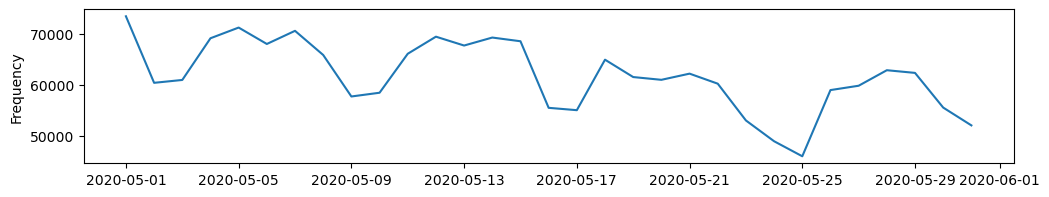

In [43]:
plt.figure(figsize=[12, 2])
plt.plot(tweets_over_time)
plt.ylabel('Frequency')
plt.show()

<img src='../images/seaborn.png' style='width: 100px; float: right; margin-left: 10px'>

With `set_theme()` from Seaborn, you can set a visual style that will be used even if you do plain Matplotlib plotting. You can choose from five styles: 'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'.

In [44]:
import seaborn as sns

In [45]:
sns.set_theme(style='darkgrid')

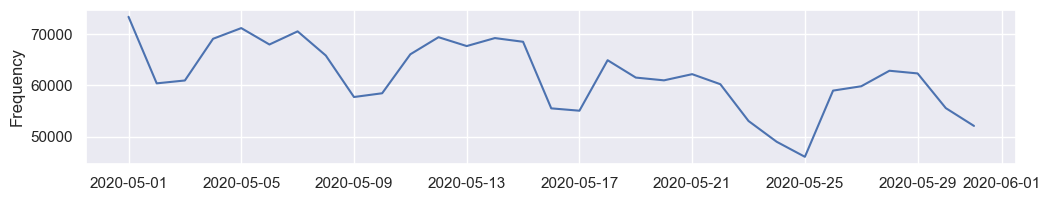

In [46]:
plt.figure(figsize=[12, 2])
plt.plot(tweets_over_time)
plt.ylabel('Frequency')
plt.show()

Now we will continue working with the arrays we have created in subsection A3.1, and we will do so in the spirit of Exploratory Data Analysis. The TweetsCOV19 webpage shows [plots](https://data.gesis.org/tweetscov19/#Statistics) about the frequency development of selected hashtags up until April 2020. We have stored the usage statistics for hashtags listed in `hashtag_list` in `days_hashtags_wide_array`. We can easily create figures for May 2020 from that 2-dimensional array. The following cell loops through the array by iterating through the `hashtag_indices` listed in line 1. Since the array that holds the y values is stripped of labels, we must take the x labels from the corresponding `days_hashtags_wide` dataframe:

In [47]:
days_hashtags_wide.index

Index(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
       '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
       '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31'],
      dtype='object', name='day')

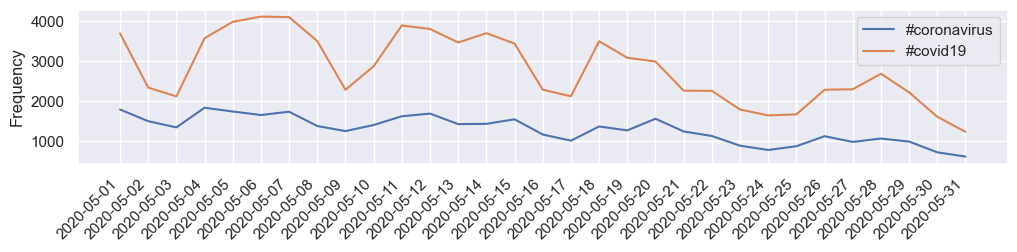

In [48]:
hashtag_indices = [0, 1]
hashtag_list = ['coronavirus', 'covid19', 'hydroxychloroquine', 'vaccine']

plt.figure(figsize=[12, 2])
for hashtag_index in hashtag_indices:
    plt.plot(days_hashtags_wide.index, days_hashtags_wide_array[:, hashtag_index], label='#' + hashtag_list[hashtag_index])
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

The plot also reveals a downward trend and a weekly rhythm.

It is equally simple to plot data that lives in 3-dimensional arrays. The TweetsCOV19 webpage also shows time trends of the mean sentiment category scores of tweets in which prominent Twitter users are mentioned up until April 2020. We have retrieved the May 2020 data for mentions in `mention_list` and stored it in `days_mentions_sentiments_wide_array`. This time we make a first loop through all mentions from `mention_categories` (line 1) and a second loop through all sentiments from `sentiment_categories` (line 3). We use datetime objects stored in `day_categories` as x values and draw the y values from the array:

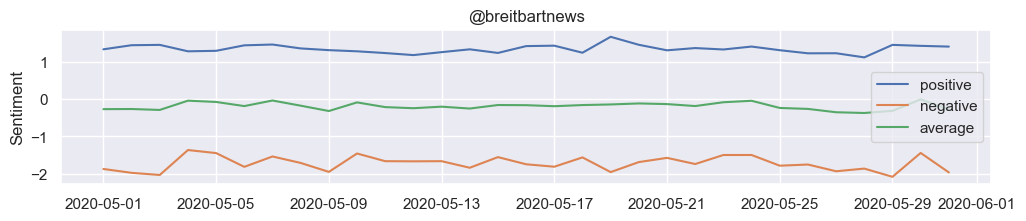

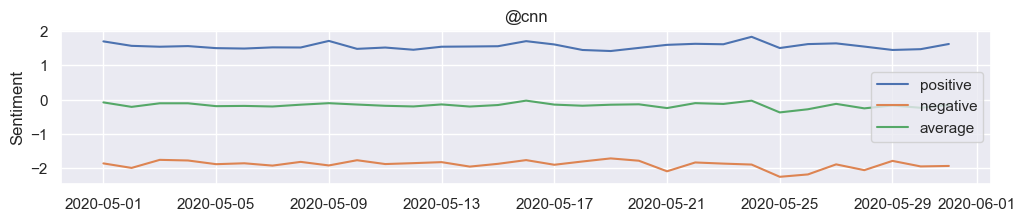

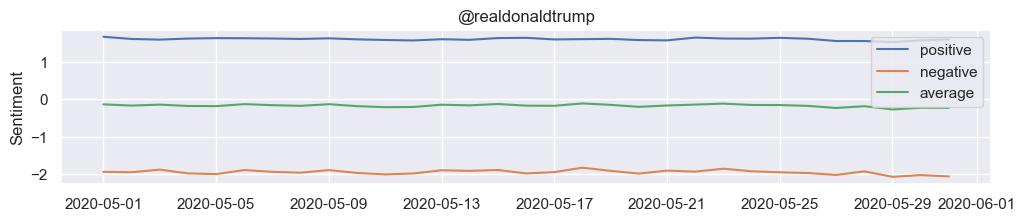

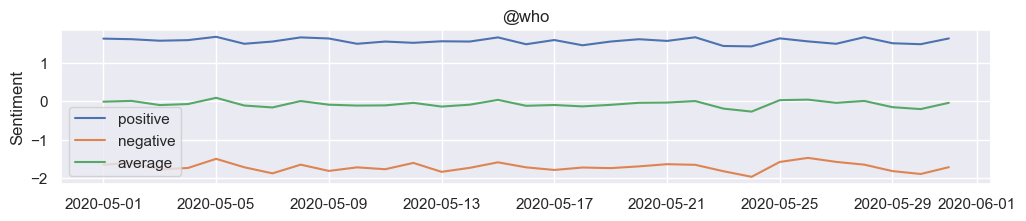

In [49]:
for mention_index in range(len(mention_categories)):
    plt.figure(figsize=[12, 2])
    for sentiment_index in range(len(sentiment_categories)):
        plt.plot(day_categories, days_mentions_sentiments_wide_array[:, mention_index, sentiment_index], label=sentiment_categories[sentiment_index])
    plt.legend()
    plt.title('@' + mention_categories[mention_index])
    plt.ylabel('Sentiment')
    plt.show()

Except for @who, the average sentiment is slightly negative. This means that the language of tweets that mention these users tends to be laden with negative emotions – it does not mean that negative sentiments are voiced about the mentioned users.

Consult Sundnes (<a href='#sundnes_introduction_2020'>2020</a>, ch. 6) for more examples on how to combine NumPy and Matplotlib.

#### Distributions

Social media data is known to often be very skewed (*i.e.*, the mean does not represent the data). Indeed, we have already seen that some users have tens of millions of followers. For quantitative analysis, it is very important to know how variables are distributed. Boxplots can be a first step to assessing distributions. In the following, we are interested in the distributions of the 'followers_max' and 'friends_max' variables in the `users` table. To produce Seaborn boxplots, `melt()` the subtable with those two columns (*i.e.*, make it long), ...

In [50]:
followers_friends = pd.melt(users[['followers_max', 'friends_max']])
followers_friends.head()

,variable,value
0,followers_max,21985402
1,followers_max,48306390
2,followers_max,3789573
3,followers_max,4149109
4,followers_max,6146072


then plot:

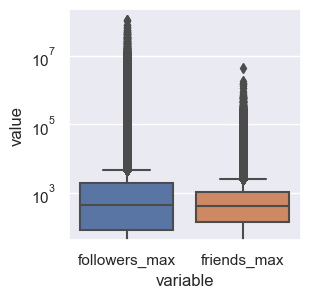

In [51]:
plt.figure(figsize=[3, 3])
sns.boxplot(x='variable', y='value', data=followers_friends)
plt.yscale('log')

Both variables are extremely skewed (note the logarithmic y-axis). Often such variables are transformed into their logarithm to make them behave better (add 1 before taking the log, then users with a value of 0 will keep it):

In [52]:
log_users = users[['followers_max', 'friends_max']].copy()
log_users = np.log10(log_users[['followers_max', 'friends_max']] + 1).round(4)
log_users.columns = ['log_followers_max', 'log_friends_max']
log_users.head()

,log_followers_max,log_friends_max
0,7.3421,3.0481
1,7.6840,3.0453
2,6.5786,2.4265
3,6.6180,0.0000
4,6.7886,1.4624


Seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) creates histograms and allows to add [kernel density estimates](https://en.wikipedia.org/wiki/Kernel_density_estimation). In line 3, we take a random sample from the data because density estimation takes quite long:

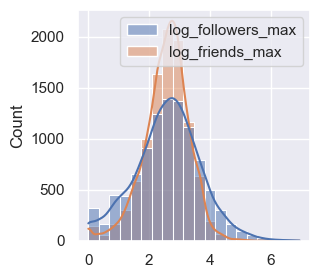

In [53]:
plt.figure(figsize=[3, 3])
sns.histplot(
    data=log_users.sample(n=10000, random_state=42), 
    bins=20, 
    kde=True
)
plt.show()

Both logged variables look normally distributed. That means it is a good hypothesis that the untransformed variables are [lognormally](https://en.wikipedia.org/wiki/Log-normal_distribution) distributed. We can test this hypothesis with the [powerlaw](https://github.com/jeffalstott/powerlaw) package.

In [54]:
# If you are running this session in Google Colab, install this package
#!pip install powerlaw==1.5

In [55]:
import powerlaw
powerlaw.__version__

'1.5'

First, we fit a number of candidate functions to the whole range (`xmin=1`) of the data using [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation):

In [56]:
fit_followers_max = powerlaw.Fit(data=users['followers_max'], xmin=1)
fit_friends_max = powerlaw.Fit(data=users['friends_max'], xmin=1)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


We plot two of these candidate functions, the lognormal and a power law:

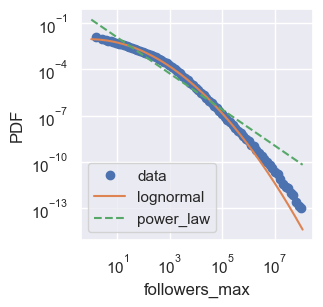

In [57]:
plt.figure(figsize=[3, 3])
fig = fit_followers_max.plot_pdf(marker='o', linestyle='', label='data')
fit_followers_max.lognormal_positive.plot_pdf(linestyle='-', ax=fig, label='lognormal')
fit_followers_max.power_law.plot_pdf(linestyle='--', ax=fig, label='power_law')
plt.legend()
plt.xlabel('followers_max')
plt.ylabel('PDF')
plt.show()

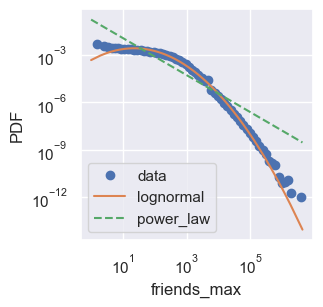

In [58]:
plt.figure(figsize=[3, 3])
fig = fit_friends_max.plot_pdf(marker='o', linestyle='', label='data')
fit_friends_max.lognormal_positive.plot_pdf(linestyle='-', ax=fig, label='lognormal')
fit_friends_max.power_law.plot_pdf(linestyle='--', ax=fig, label='power_law')
plt.legend()
plt.xlabel('friends_max')
plt.ylabel('PDF')
plt.show()

The lognormal seems to be a better fit for the data in both cases. We can test this using loglikelihood ratios. In both cases, the ratio (the first value in the brackets) is extremely large and significantly (the second value in the bracket) different from 0. A large significant value means that the first distribution, in these cases the lognormal distribution, is a better fit to the data:

In [59]:
fit_followers_max.distribution_compare('lognormal_positive', 'power_law')

(554015.6002915202, 0.0)

In [60]:
fit_friends_max.distribution_compare('lognormal_positive', 'power_law')

(937116.3566349999, 0.0)

We have found that both variables are, in fact, lognormally distributed.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

These results from fitting functions to the data mean that the variables are certainly not **power-law distributions**. Knowing about power-law behavior is important because, depending on their exponent, power laws do not have characteristic sample variance or even sample mean, which is statistically problematic. To learn about the importance of power-law distributions, consult Clauset *et al.* (<a href='#clauset_powerlaw_2009'>2009</a>).
</div>

#### Bivariate relationships

Identifying bivariate relationships or correlations is another part of EDA. Seaborn's [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) function creates joint and marginal views on two variables. There are four different `kind`s of views. Here, we show histograms (line 5): 

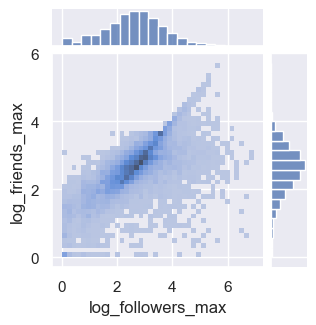

In [61]:
plot = sns.jointplot(
    data = log_users.sample(n=10000, random_state=42), 
    x = 'log_followers_max', 
    y = 'log_friends_max', 
    kind = 'hist', 
    joint_kws = dict(bins=40), 
    marginal_kws = dict(bins=20)
)
plot.fig.set_figwidth(3)
plot.fig.set_figheight(3)

If you have many variables whose relationships you want to explore, Seaborn offers the [`pairplot()`]() function. The diagonal of such a plot will be filled with the univariate distribution, and the kind of view can be set separately for the univariate (`diag_kind` parameter) and bivariate cases. This time, we plot the relationships for the four numerical variables of the `tweets` table (excluding the sentiment scores). Since they are very skewed, we log them first:

In [62]:
log_tweets = tweets[['followers', 'friends', 'retweets', 'favorites']].copy()
log_tweets = np.log10(log_tweets[['followers', 'friends', 'retweets', 'favorites']] + 1)
log_tweets.columns = ['log_followers', 'log_friends', 'log_retweets', 'log_favorites']

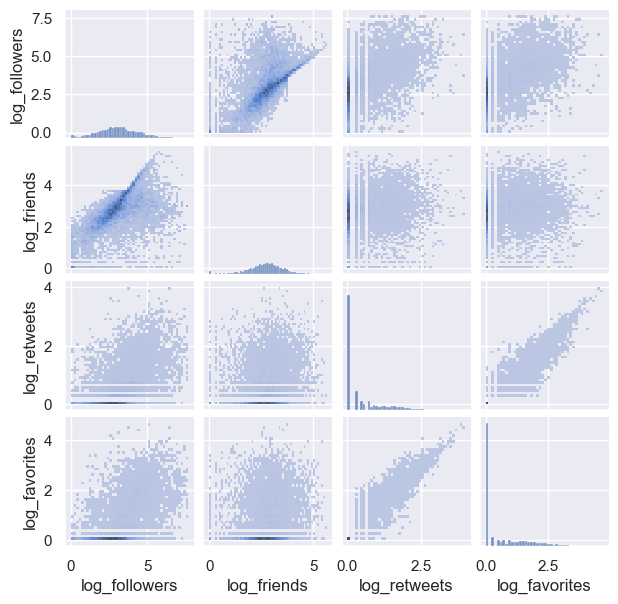

In [63]:
plot = sns.pairplot(
    data = log_tweets.sample(n=10000, random_state=42), 
    height = 2, 
    kind = 'hist', 
    diag_kind = 'hist'
)
plot.fig.set_figwidth(6)
plot.fig.set_figheight(6)

___

This concludes Session A3: Scientific computing and data visualization. Now that we have an idea of how to manage, process, and explore our data in a research pipeline, we move to the first step of the data life cycle. [Session B1: API harvesting](../b_data_collection_methods/1_api_harvesting.ipynb), [Session B2: Data parsing and static web scraping](../b_data_collection_methods/2_data_parsing_and_static_web_scraping.ipynb), and [Session B3: Dynamic web scraping](../b_data_collection_methods/3_dynamic_web_scraping.ipynb) are dedicated to data collection.

## References

### Recommended readings

<a id='mclevey_doing_2022'></a>
McLevey, J. (2022). *Doing Computational Social Science: A Practical Introduction*. SAGE. https://us.sagepub.com/en-us/nam/doing-computational-social-science/book266031. *A rather complete introduction to the field with well-structured and insightful chapters also on using Pandas. The [website](https://github.com/UWNETLAB/dcss_supplementary) offers the code used in the book. For this session, read **ch. 7** on visualization and Exploratory Data Analysis.*

<a id='sundnes_introduction_2020'></a>
Sundnes, J. (2020). *Introduction to Scientific Programming with Python*. Springer. https://doi.org/10.1007/978-3-030-50356-7. *An openly accessible introduction covering the basic functionalities of Python. The [website](https://sundnes.github.io/python_intro/) offers the code used in the book. For this session, read **ch. 6** on NumPy arrays and data visualization.*

### Complementary readings

<a id='batagelj_on_2013'></a>
Batagelj, V. & Cerinsěk, M. (2013). On bibliographic networks. *Scientometrics* 96:845–864. https://doi.org/10.1007/s11192-012-0940-1. *A systematic treatise about various ways matrices can be normalized.*

<a id='clauset_powerlaw_2009'></a>
Clauset, A., Shalizi, C. R., & Newman, M. E. J. (2009). "Power-law distributions in empirical data". *SIAM Review* 51:661–703. https://doi.org/10.1137/070710111. *Review about the meaning of power laws and how to identify them using maximum likelihood estimation.*

<a id='weidmann_data_2023'></a>
Weidmann, N. B. (2023). *Data Management for Social Scientists: From Files to Databases*. Cambridge University Press. *A fresh account of data management and processing. The book uses R, but general insights also apply to Python.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz

Contributors: Pouria Mirelmi & N. Gizem Bacaksizlar Turbic

Acknowledgements: Olga Zagovora

Version date: 15 November 2023

License: Creative Commons Attribution 4.0 International (CC BY 4.0)
</div>